# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge


## Exploratory Data Analysis 

In [3]:
adv_data = pd.read_csv("./data/Advertising.csv")
adv_data = adv_data.loc[:,"TV":]
adv_data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
5,8.7,48.9,75.0,7200.0
6,57.5,32.8,23.5,11800.0
7,120.2,19.6,11.6,13200.0
8,8.6,2.1,1.0,4800.0
9,199.8,2.6,21.2,10600.0


In [4]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
adv_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


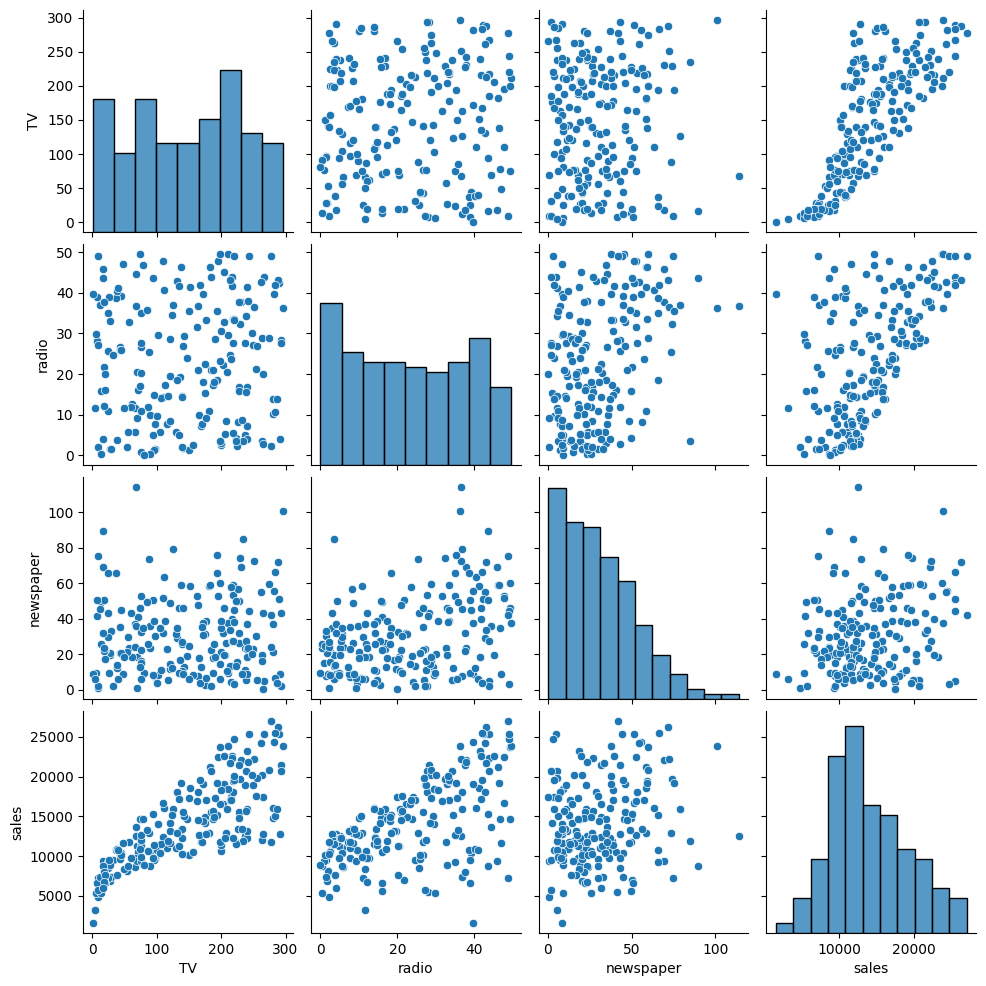

In [13]:
sns.pairplot(adv_data);

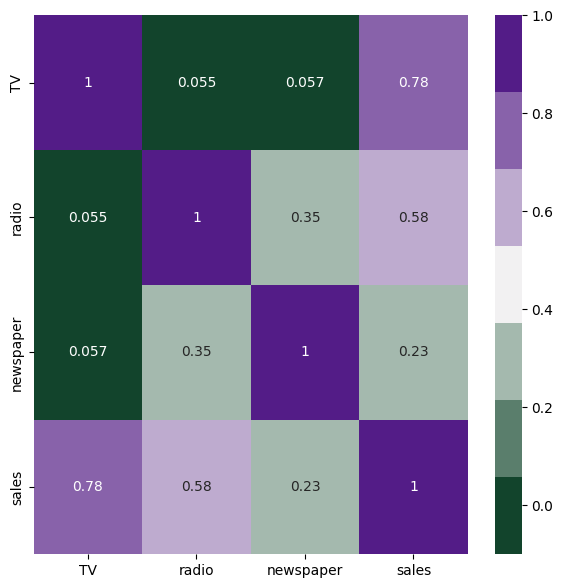

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(adv_data.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

## Modelado

In [6]:
X = adv_data.iloc[:,:3]
y = adv_data.iloc[:,-1]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Miramos los shape de cada test y train para ver si lo hemos hecho bien
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(160, 3)
(160,)
(40, 3)
(40,)


In [55]:
#Miramos los shape de cada test y train para ver si lo hemos hecho bien


(160, 3)
(40, 3)
(160,)
(40,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Regresión Lineal

In [12]:
#instancia y fit del modelo lineal

lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

# Se calculan predicciones
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

# Se calcula el error constante para hacer la gráfica
baseline_error = metrics.mean_squared_error(y_test, y_test_pred)




In [13]:
# Se calculan errores de la regresión lineal

print("MAE Test", mean_absolute_error(y_test,y_test_pred))
print("MSE Test ", mean_squared_error(y_test,y_test_pred))
print("MAPE Test ", mean_absolute_percentage_error(y_test,y_test_pred))
print("RMSE Test", np.sqrt(mean_squared_error(y_test,y_test_pred)))

MAE Test 1361.7813502090273
MSE Test  4402118.291449683
MAPE Test  0.246108506100056
RMSE Test 2098.12256349568


In [ ]:
# REFERENCIA

print('MAE test', )
print('MSE test', )
print('MAPE test', )
print('RMSE test', )

MAE test 1361.7813502090273
MSE test 4402118.291449686
MAPE test 0.24610850610005608
RMSE test 2098.1225634956804


# Ridge

In [14]:
# instancia y fit del ridge
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10)
ridgeR.fit(X_train, y_train)

print('MAE test', round(mean_absolute_error(y_test, ridgeR.predict(X_test)),2))
print('MSE test', round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))
print("MAPE Test ", round(mean_absolute_percentage_error(y_test,ridgeR.predict(X_test)),2))
print('RMSE test', round(np.sqrt(mean_squared_error(y_test, ridgeR.predict(X_test))),2))

MAE test 1361.68
MSE test 4401206.98
MAPE Test  0.25
RMSE test 2097.91


In [ ]:
# REFERENCIA

print('MAE test', )
print('MSE test', )
print('RMSE test', )

MAE test 1361.6785049651596
MSE test 4401206.97804551
RMSE test 2097.905378715997


In [ ]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 

alphas


array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

In [68]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 
alphas

array([1.00000000e+01, 1.26638017e+01, 1.60371874e+01, 2.03091762e+01,
       2.57191381e+01, 3.25702066e+01, 4.12462638e+01, 5.22334507e+01,
       6.61474064e+01, 8.37677640e+01, 1.06081836e+02, 1.34339933e+02,
       1.70125428e+02, 2.15443469e+02, 2.72833338e+02, 3.45510729e+02,
       4.37547938e+02, 5.54102033e+02, 7.01703829e+02, 8.88623816e+02,
       1.12533558e+03, 1.42510267e+03, 1.80472177e+03, 2.28546386e+03,
       2.89426612e+03, 3.66524124e+03, 4.64158883e+03, 5.87801607e+03,
       7.44380301e+03, 9.42668455e+03, 1.19377664e+04, 1.51177507e+04,
       1.91448198e+04, 2.42446202e+04, 3.07029063e+04, 3.88815518e+04,
       4.92388263e+04, 6.23550734e+04, 7.89652287e+04, 1.00000000e+05])

In [107]:
coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    err_ridge.append(ridge_error)

    baseline.append(baseline_error)

In [72]:
n_alphas = 40
alphas = np.logspace(1, 5, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

errors = {}

for a in alphas:
    # como en el ejercicio...

In [109]:
err_ridge.index(min(err_ridge))

28

In [128]:
ridge_alpha = round(alphas[28],2)

In [154]:
coef_ridge[err_ridge.index(min(err_ridge))]

array([ 44.36361946, 158.61235199,   5.19121253])

In [ ]:
# alpha buena
alphas[err_ridge.index(min(err_ridge))]

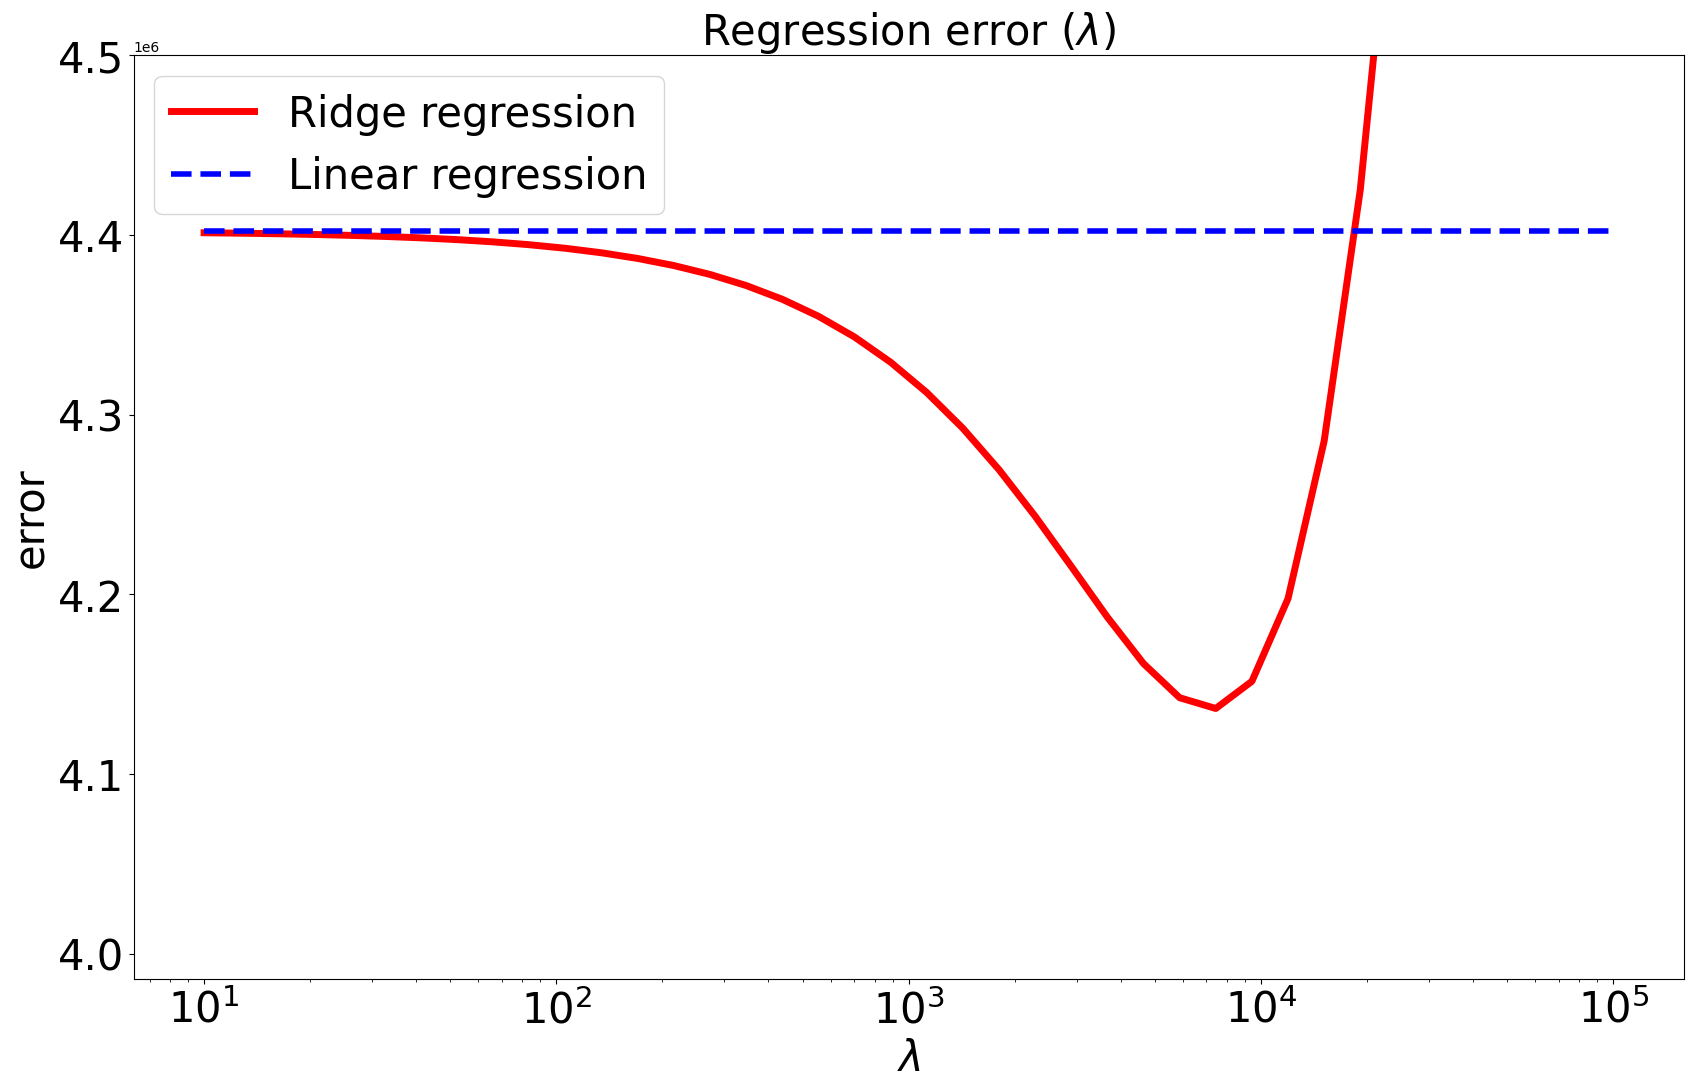

In [111]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.ylim(None, 4500000)
plt.show()

In [129]:
# entrenar el Ridge con el mejor alpha, CUIDADO QUE IGUAL NO OS SALE IDENTICO!!!

ridgeR = Ridge(alpha = ridge_alpha)
ridgeR.fit(X_train, y_train)

print('MAE test', round(mean_absolute_error(y_test, ridgeR.predict(X_test)),2))
print('MSE test', round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))
print("MAPE Test ", round(mean_absolute_percentage_error(y_test,ridgeR.predict(X_test)),2))
print('RMSE test', round(np.sqrt(mean_squared_error(y_test, ridgeR.predict(X_test))),2))

MAE test 1356.57
MSE test 4136464.86
MAPE Test  0.23
RMSE test 2033.83


In [132]:
# Error de la Regresión Lineal
print("MSE Test (Regresión Lineal)", mean_squared_error(y_test,y_test_pred))

MSE Test (Regresión Lineal) 4402118.291449683


In [ ]:
# Coeficientes de la regresión lineal
lr.coef_

array([ 44.58402012, 196.49703416,  -2.78146398])

In [131]:
ridgeR.coef_

array([ 44.36361955, 158.61236425,   5.19121022])

In [ ]:
# LIN_REG SCORE
lr.score(X_test,y_test)

0.8601145185017869

In [135]:
# RIDGE_SCORE
ridgeR.score(X_test,y_test)

0.8685561496287726

array([ 44.3748285 , 160.21529916,   4.88765351])

# Lasso

In [137]:
# REPETIMOS CON LASSO Y ALPHA=10
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=10)
lassoR.fit(X_train, y_train)

print('MAE test', round(mean_absolute_error(y_test, lassoR.predict(X_test)),2))
print('MSE test', round(mean_squared_error(y_test, lassoR.predict(X_test)),2))
print("MAPE Test ", round(mean_absolute_percentage_error(y_test,lassoR.predict(X_test)),2))
print('RMSE test', round(np.sqrt(mean_squared_error(y_test, lassoR.predict(X_test))),2))

MAE test 1361.79
MSE test 4401370.76
MAPE Test  0.25
RMSE test 2097.94


In [ ]:
n_alphas = 100
alphas = np.logspace(1, 4, n_alphas) 

coef_lasso = []
err_lasso = []
baseline = []

In [150]:
coef_lasso = []
err_lasso = []
baseline = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    
    coef_lasso.append(lasso.coef_)
    
    y_pred = lasso.predict(X_test)
    
    lasso_error = metrics.mean_squared_error(y_pred, y_test)
    err_lasso.append(lasso_error)

    baseline.append(baseline_error)

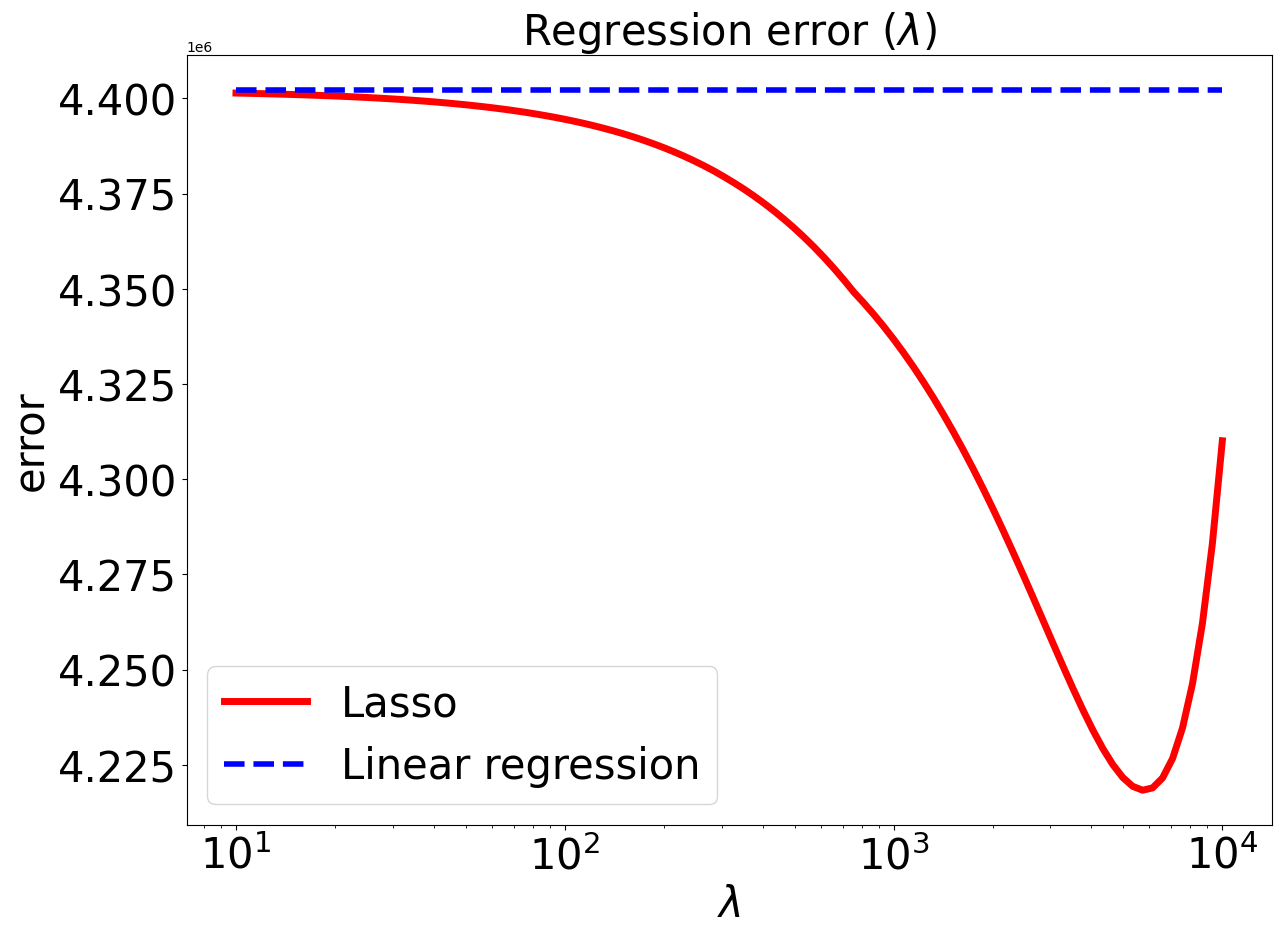

In [167]:
plt.figure(figsize=(14,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [162]:
(np.min(err_lasso))

np.float64(4218332.61046398)

In [163]:
err_lasso.index(np.min(err_lasso))

91

In [166]:
lasso_alpha = alphas[err_lasso.index(np.min(err_lasso))]
lasso_alpha

np.float64(5722.3676593502205)

In [169]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train, y_train)

print('MAE test', round(mean_absolute_error(y_test, lasso.predict(X_test)),2))
print('MSE test', round(mean_squared_error(y_test, lasso.predict(X_test)),2))
print("MAPE Test ", round(mean_absolute_percentage_error(y_test,lasso.predict(X_test)),2))
print('RMSE test', round(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))),2))

MAE test 1341.0
MSE test 4218332.61
MAPE Test  0.23
RMSE test 2053.86


# Elastic net

In [181]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 1000, l1_ratio = 0.1)
elastic_net.fit(X_train, y_train)

print("MAE Test: %0.4f" % metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print("MSE Test: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))
print("RMSE Test: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))

MAE Test: 2218.8813
MSE Test: 8083355.9197
RMSE Test: 2843.1243


In [92]:
# elasrtnet alpha=1000, r = 0.1

print('MAE test', )
print('MSE test',)
print('RMSE test', )

MAE test 2218.8813260810903
MSE test 8083355.919689266
RMSE test 2843.124323642789


In [174]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
    # from sklearn.model_selection import GridSearchCV

    # elastic = ElasticNet()

    # parameters = {'alpha': np.logspace(0,2,20),
    #               'l1_ratio': np.arange(0,1,0.1)
    #             }

    # elastic_gs = GridSearchCV(elastic, parameters, cv=3, scoring='neg_mean_squared_error', verbose=1)

    # elastic_gs.fit(X_train, y_train)


Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [17]:
coef_eln = []
err_eln = []
baseline = []
alphas_eln = []
r_eln = []
minimo = 1000000000000000000000
for a in alphas:
    for r in np.arange(0,1.1,0.1):
        elastic_net = ElasticNet(alpha = a, l1_ratio=r)
        elastic_net.fit(X_train, y_train)
        coef_eln.append(elastic_net.coef_)
        y_pred = elastic_net.predict(X_test)
        elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
        err_eln.append(elasticnet_error)
        baseline.append(baseline_error)
        alphas_eln.append(a)
        r_eln.append(r)
        if elasticnet_error < minimo:
            minimo = elasticnet_error

NameError: name 'alphas' is not defined

In [197]:
minimo

np.float64(4136304.5462898063)

In [185]:
(np.min(err_eln))

np.float64(4136304.5462898063)

In [186]:
err_eln.index((np.min(err_eln)))

254

In [195]:
eln_alpha = alphas_eln[254]
eln_alpha

np.float64(49.770235643321115)

In [196]:
eln_r = r_eln[254]
eln_r

np.float64(0.1)

In [16]:
elastic_net = ElasticNet(alpha = eln_alpha, l1_ratio=eln_r)
elastic_net.fit(X_train, y_train)

print("MAE Test: %0.4f" % metrics.mean_absolute_error(y_test, elastic_net.predict(X_test)))
print("MSE Test: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))
print("RMSE Test: %0.4f" % np.sqrt(metrics.mean_squared_error(y_test, elastic_net.predict(X_test))))

NameError: name 'eln_alpha' is not defined

In [ ]:
# buscad alpha y r con el doble bucle

In [100]:


print('MAE test',)
print('MSE test',)
print('RMSE test', )

MAE test 1361.6178647286993
MSE test 4400594.461930206
RMSE test 2097.7593908573513


In [101]:

# ridge = Ridge()

# parameters = {'alpha': np.logspace(0,5,100)
#             }

# ridge_gs = GridSearchCV(ridge, parameters, cv=3, scoring='neg_mean_squared_error', verbose =200)

# ridge_gs.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3; 1/100] START alpha=1.0.................................................
[CV 1/3; 1/100] END ...........alpha=1.0;, score=-1934022.479 total time=   0.0s
[CV 2/3; 1/100] START alpha=1.0.................................................
[CV 2/3; 1/100] END ...........alpha=1.0;, score=-3118333.260 total time=   0.0s
[CV 3/3; 1/100] START alpha=1.0.................................................
[CV 3/3; 1/100] END ...........alpha=1.0;, score=-2731228.109 total time=   0.0s
[CV 1/3; 2/100] START alpha=1.1233240329780274..................................
[CV 1/3; 2/100] END alpha=1.1233240329780274;, score=-1934010.794 total time=   0.0s
[CV 2/3; 2/100] START alpha=1.1233240329780274..................................
[CV 2/3; 2/100] END alpha=1.1233240329780274;, score=-3118339.778 total time=   0.0s
[CV 3/3; 2/100] START alpha=1.1233240329780274..................................
[CV 3/3; 2/100] END alpha=1.1233240329

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9....
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error', verbose=200)

In [104]:


# ridge = Ridge(alpha=1)
# ridge.fit(X_train, y_train)

# print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
# print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
# print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 1361.7710633068214
MSE test 4402027.062786828
RMSE test 2098.1008228364117


## Resultados

Nos quedmaos con el modelo de Lasso del principio, con un alpha=6000 porque es el modelo que mejor generaliza, o lo que es lo mismo, el modelo que tiene errores más bajos en sus predicciones ante los datos de test.

In [15]:
# Ridge
print('MAE test', round(mean_absolute_error(y_test, ridgeR.predict(X_test)),2))
print('MSE test', round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))
print("MAPE Test ", round(mean_absolute_percentage_error(y_test,ridgeR.predict(X_test)),2))
print('RMSE test', round(np.sqrt(mean_squared_error(y_test, ridgeR.predict(X_test))),2))

MAE test 1361.68
MSE test 4401206.98
MAPE Test  0.25
RMSE test 2097.91


In [ ]:
# Elastic Net


In [72]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

# BONUS TRACK:

REPETIR RESULTADOS USANDO POLY FEATURES
